In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx
import pickle

In [49]:
k_scale = 0.1
results_folder = f'asd_only_louvain_results_knn_weighted/k_scale_{k_scale}'
# k_scale = 0.6
# results_folder = f'asd_only_louvain_results_knn_no_weights/k_scale_{k_scale}'

In [50]:
def get_cluster_df(sample_size, i, replace = False):
    folder_path = f"{results_folder}/{sample_size}/{i}"
    df = pd.read_pickle(f"{folder_path}/sample_df.pkl")
    if "index" in df.columns:
        df = df.drop("index", axis=1)
    # in some experiments with small sample size, cluster 4 is split into 4 and 5
    # seems like dev_lang_dis is what is causing this
    if replace:
        df["cluster"] = df["cluster"].replace(5, 4)
    return df

def get_communinies(sample_size, i ):
    folder_path = f"{results_folder}/{sample_size}/{i}"
    with open(f"{folder_path}/communities.pkl", 'rb') as file:
        communities = pickle.load(file)
    return communities


In [51]:
# def get_mean_values(df):
#     mean_values_df = df.groupby("cluster").mean()
#     # if cluster 0 is the ASD cluster, swap the rows to make sure cluster 0 is non-ASD and cluster 1 is ASD => consistent between all experiment runs
#     if mean_values_df.iloc[0]['asd'] > mean_values_df.iloc[1]['asd']:
#         mean_values_df.iloc[[0, 1]] = mean_values_df.iloc[[1, 0]].values
#         # print("Cluster 0 and 1 swapped!")
#     return mean_values_df


def get_mean_values(df):
    mean_values_df = df.groupby("cluster").mean()
    # sort the clusters by the mean value of the 'asd' column
    # mean_values_df = mean_values_df.sort_values(by='asd')
    mean_values_df = mean_values_df.sort_values(by='attn_behav').reset_index(drop=True)
    mean_values_df = mean_values_df.sort_values(by='dev_lang').reset_index(drop=True)
    mean_values_df = mean_values_df.sort_values(by='dev_lang_dis').reset_index(drop=True)
    
    return mean_values_df

In [52]:
def print_heatmap(means_df, save_path=None):
    #Plot Heatmap
    plt.figure(figsize=(8, 5))
    means_df.index = range(1, len(means_df) + 1)
    sns.heatmap(means_df, annot=False, cmap='viridis')
    plt.title('Mean value of variables by cluster')
    plt.ylabel('Cluster')
    plt.xlabel('Variable')
    plt.tight_layout()

    if save_path:
        plt.savefig(save_path)


In [35]:
# Check if the number of clusters are consistent between different runs
sample_sizes = [1000, 10000, 20000, 22274]
# sample_sizes = [1000, 10000, 20000]
for n in sample_sizes:
    print()
    print(f"Sample size: {n}")
    lengths = []
    for i in range(5):
        communities = get_communinies(n, i)
        len_communities = len(communities)
        lengths.append(len_communities)
        print(len_communities)
    # print(lengths)
    if len(set(lengths)) > 1:
        print("!!! Number of clusters are not consistent between different runs")



Sample size: 1000
2
2
2
3
3
!!! Number of clusters are not consistent between different runs

Sample size: 10000
3
3
3
3
3

Sample size: 20000
3
2
3
3
3
!!! Number of clusters are not consistent between different runs

Sample size: 22274
2


FileNotFoundError: [Errno 2] No such file or directory: 'asd_only_louvain_results_knn_no_weights/k_scale_0.6/22274/1/communities.pkl'

In [55]:
means.columns

Index(['asd', 'dcdq_score', 'rbsr_score', 'scq_score', 'dev_lang',
       'dev_lang_dis', 'sex', 'attn_behav', 'dev_speech', 'dev_soc_prag',
       'birth_oth_calc', 'dev_motor', 'behav_adhd', 'dev_ld', 'neuro_oth_calc',
       'psych_oth_calc', 'behav_odd', 'mood_dep', 'mood_soc_anx', 'mood_anx',
       'mood_ocd', 'mood_sep_anx', 'mood_dmd', 'mood_bipol', 'multiple_birth',
       'mood_or_anx', 'gen_dx_oth_calc_self_report', 'mood_hoard',
       'behav_intermitt_explos', 'behav_conduct', 'dev_mutism'],
      dtype='object')

,dcdq_score,rbsr_score,scq_score
1,0.436460,0.246047,0.522771
2,0.423647,0.266618,0.517847
3,0.365767,0.289889,0.552277
4,0.367013,0.254366,0.575352
5,0.331010,0.317095,0.622069


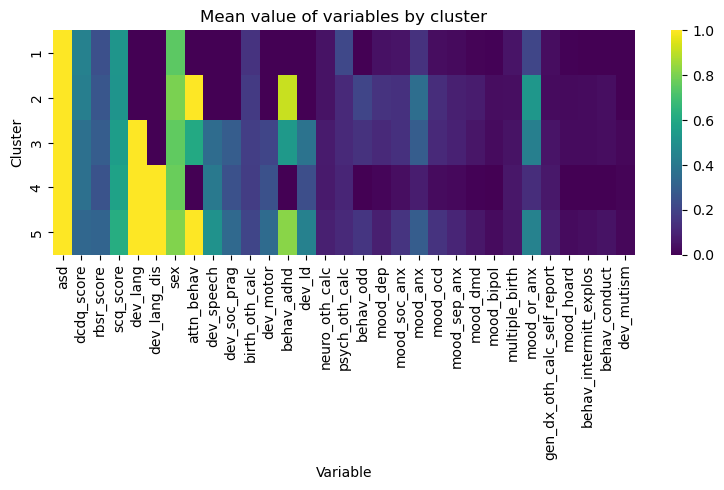

In [60]:
# df = get_cluster_df(10000 , 2)
df = get_cluster_df(22274 , 0)
# df = get_cluster_df(20000 , 1)
# df = get_cluster_df(20000 , 0)
# mean_values_df = df.groupby("cluster").mean()
mean_df = get_mean_values(df)
print_heatmap(mean_df)
# print_heatmap(mean_df, save_path='figures/louvain_heatmap_asd_only_20k_non_weighted.pdf')
# np.mean(df['sex'])
# ! NOTE - 78% of the patients are male
mean_df[['dev_lang', 'dev_lang_dis', 'sex', 'attn_behav', 'behav_adhd', 'dev_speech',
     'mood_anx', 'mood_or_anx']]

mean_df[['dcdq_score', 'rbsr_score', 'scq_score']]
